In [3]:
import cv2
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
% matplotlib inline
from IPython.display import HTML




In [59]:
def draw_flow(img, flow, step=16):
    h, w = img.shape[:2]
    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1)
    fx, fy = flow[y,x].T
    lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines + 0.5)
    vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.polylines(vis, lines, 0, (0, 255, 0))
    for (x1, y1), (x2, y2) in lines:
        cv2.circle(vis, (x1, y1), 1, (0, 255, 0), -1)
    return vis

In [15]:
%%HTML
<video width="320" height="240" controls>
  <source src="sample.mp4" type="video/mp4">
</video>

In [18]:
SOURCE = "sample.mp4"
cap = cv2.VideoCapture(SOURCE)
frame_rate = cap.get(cv2.cv.CV_CAP_PROP_FPS)
height = cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH)
frames_count = cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT)

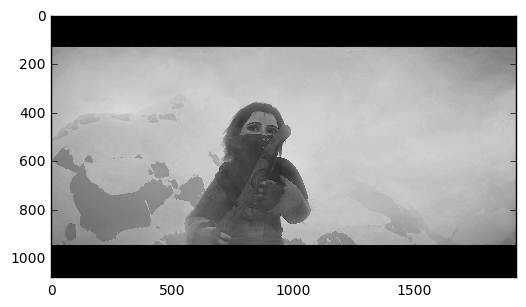

In [65]:
ret1, frame1 = cap.read()
ret2, frame2 = cap.read()
for x in range(0, 20): #24 sec in 
    ret2, frame2 = cap.read()
    cap.read()
    ret1, frame1 = cap.read()

#gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

r2, g2, b2 = cv2.split(frame1)
plt.imshow(r2, cmap='gray')



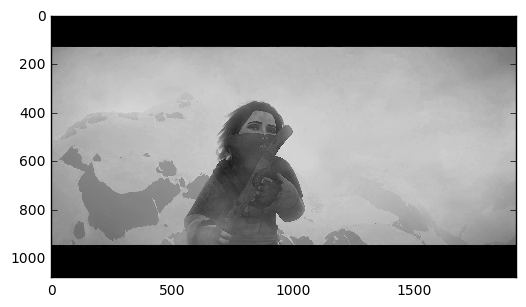

In [67]:
r1, g1, b1 = cv2.split(frame2)
#gray2 = cv2.cvtColor(r1, cv2.COLOR_BGR2GRAY)
plt.imshow(r1, cmap='gray')

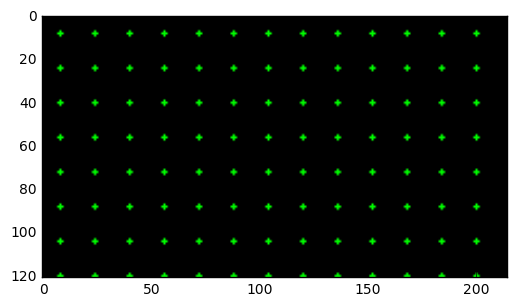

In [71]:
result = cv2.calcOpticalFlowFarneback((r1), (r2), pyr_scale=0.5, levels=1, 
                             winsize=10, iterations=2, poly_n=5, poly_sigma=1.1,
                            flags=1)

data =  cv2.cvtColor(cv2.imread('black.png'), cv2.COLOR_RGB2GRAY)

plt.imshow(draw_flow(data, result))


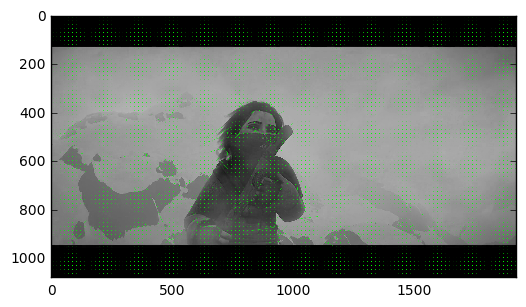

In [72]:
plt.imshow(draw_flow(r1, result))